## Principal Component Analysis

We have the Iris dataset, which has 3 classes 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'. 
Each class has 50 samples. Each sample is represented by four features Sepal_length, Sepal_height, 
Petal_length, Petal_height. We would apply to reduce the dimenion using PCA.
<img src="iris_with_labels.jpg" width=400 height=400 />

                        
Objective Function: To maximize the variance. 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dataset_path = "C:\\Users\\asus\\OneDrive\\Desktop\\Projects\\Internship studio\\dataset\\Iris\\iris.data"

In [28]:
data = pd.read_csv(dataset_path,names=["Sepal_length", "Sepal_height", "Petal_length", "Petal_height", "Class_name"])
data.head(10)

,Sepal_length,Sepal_height,Petal_length,Petal_height,Class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Iris-setosa class population: 50
Iris-versicolor class population: 50
Iris-versicolor class population: 50


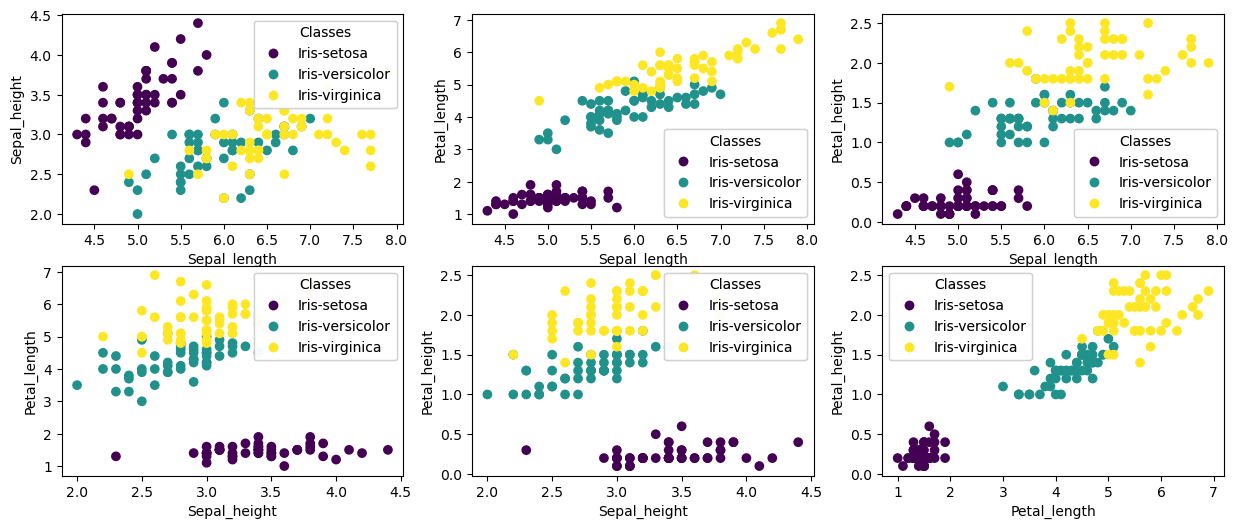

In [30]:
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
labels = list(data["Class_name"].values)
print("Iris-setosa class population:",labels.count("Iris-setosa"))
print("Iris-versicolor class population:",labels.count("Iris-versicolor"))
print("Iris-versicolor class population:",labels.count("Iris-virginica"))
labels_categorical = [class_names.index(item) for item in labels]
Sepal_length = list(data["Sepal_length"].values)
Sepal_height = list(data["Sepal_height"].values)
Petal_length = list(data["Petal_length"].values)
Petal_height =list(data["Petal_height"].values)

# Plot the sample distribution "Sepal_length VS Sepal_height"
fig, ax = plt.subplots(nrows = 2, ncols = 3,figsize=(15, 6))
# produce a legend with the unique colors from the scatter
scatter = ax[0,0].scatter(Sepal_length, Sepal_height, c=labels_categorical)
legend = ax[0,0].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[0,0].add_artist(legend)
ax[0,0].set_xlabel('Sepal_length')
ax[0,0].set_ylabel('Sepal_height')


# produce a legend with the unique colors from the scatter
scatter = ax[0,1].scatter(Sepal_length, Petal_length, c=labels_categorical)
legend = ax[0,1].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="lower right", title="Classes")
ax[0,1].add_artist(legend)
ax[0,1].set_xlabel('Sepal_length')
ax[0,1].set_ylabel('Petal_length')

# produce a legend with the unique colors from the scatter
scatter = ax[0,2].scatter(Sepal_length, Petal_height, c=labels_categorical)
legend = ax[0,2].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="lower right", title="Classes")
ax[0,2].add_artist(legend)
ax[0,2].set_xlabel('Sepal_length')
ax[0,2].set_ylabel('Petal_height')


# produce a legend with the unique colors from the scatter
scatter = ax[1,0].scatter(Sepal_height, Petal_length, c=labels_categorical)
legend = ax[1,0].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[1,0].add_artist(legend)
ax[1,0].set_xlabel('Sepal_height')
ax[1,0].set_ylabel('Petal_length')

# produce a legend with the unique colors from the scatter
scatter = ax[1,1].scatter(Sepal_height, Petal_height, c=labels_categorical)
legend = ax[1,1].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
ax[1,1].add_artist(legend)
ax[1,1].set_xlabel('Sepal_height')
ax[1,1].set_ylabel('Petal_height')

# produce a legend with the unique colors from the scatter
scatter = ax[1,2].scatter(Petal_length, Petal_height, c=labels_categorical)
legend = ax[1,2].legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper left", title="Classes")
ax[1,2].add_artist(legend)
ax[1,2].set_xlabel('Petal_length')
ax[1,2].set_ylabel('Petal_height')

plt.show()

In [31]:
X = np.array([Sepal_length, Sepal_height, Petal_length, Petal_height]).T
target = labels_categorical

# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)
print("Mean aligned data:",X_meaned.shape)

# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
print("Covariance Matrix:\n",cov_mat)

#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print("Eigen values:\n",eigen_values)
print("Eigen vectors:\n",eigen_vectors)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
explained_varaince=(np.sum(sorted_eigenvalue[0:n_components])/np.sum(sorted_eigenvalue))*100
print("Explained variance:{}%".format(explained_varaince))
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print("Transformed data:",X_reduced.shape)

Mean aligned data: (150, 4)
Covariance Matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
Eigen values:
 [0.02368303 0.07852391 0.24224357 4.22484077]
Eigen vectors:
 [[ 0.31725455  0.58099728  0.65653988 -0.36158968]
 [-0.32409435 -0.59641809  0.72971237  0.08226889]
 [-0.47971899 -0.07252408 -0.1757674  -0.85657211]
 [ 0.75112056 -0.54906091 -0.07470647 -0.35884393]]
Explained variance:97.76317750248035%
Transformed data: (150, 2)


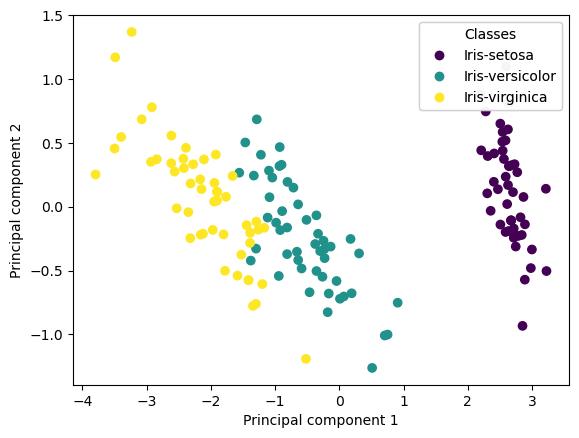

In [32]:
if n_components==2:
    # Plot the sample distribution "Sepal_length VS Sepal_height"
    fig, ax = plt.subplots()
    # produce a legend with the unique colors from the scatter
    scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1], c=labels_categorical)
    legend = ax.legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
    ax.add_artist(legend)
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    plt.show()
if n_components==3:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(elev=11, azim=-69)
    scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2], c=labels_categorical)
    legend = ax.legend(handles=scatter.legend_elements()[0], labels=class_names,loc="upper right", title="Classes")
    ax.add_artist(legend)
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    ax.set_zlabel('Principal component 3')
    plt.show()